In [1]:
from divtel import *
from astropy.coordinates import get_icrs_coordinates

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Let's set the observing conditions. 
# Since our list contains all kind of telescopes let's set the site to Paranal
cta = CTA_Info('south','2024-02-20T00:00')
cta_2 = CTA_Info('south','2024-02-20T00:00')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:00:00.000


In [3]:
# By default there is no pointing direction defined for the array
print ("source:", cta.source)

source: None


In [4]:
# instead of pointing to a random alt, az coordinate a source direction can be set.
# We chose Adhara and read coordinates from astropy catalogues
name='adhara'
name_2="wezen"
star = get_icrs_coordinates(name)
star_2 = get_icrs_coordinates(name_2)
star_altaz=star.transform_to(cta.altaz)
star_altaz_2=star_2.transform_to(cta_2.altaz)
cta.set_source_loc(ra=star.ra, dec=star.dec)
cta_2.set_source_loc(ra=star_2.ra, dec=star_2.dec)
print ("source:", cta.source)
print ("source_2:", cta_2.source)

source: <SkyCoord (AltAz: obstime=2024-02-20T00:00:00.000, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (106.48596412, 66.5530677)>
source_2: <SkyCoord (AltAz: obstime=2024-02-20T00:00:00.000, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (100.1715864, 64.43596005)>


        Use get_body("moon") instead. [divtel.cta]


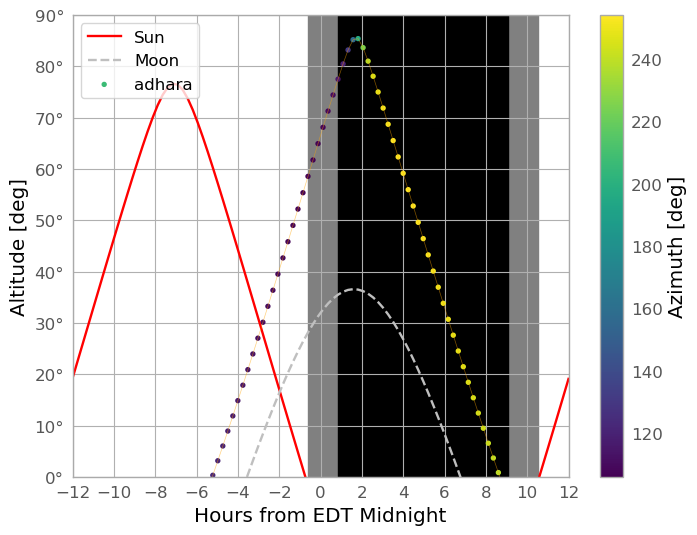

<module 'matplotlib.pyplot' from '/Users/macbook/miniconda3/envs/divtel/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [5]:
cta.navigation_plot(label=name)

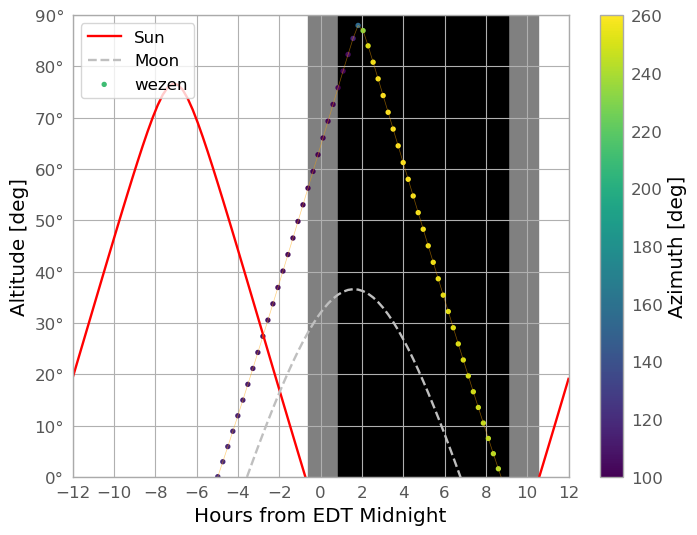

<module 'matplotlib.pyplot' from '/Users/macbook/miniconda3/envs/divtel/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [6]:
cta_2.navigation_plot(label=name_2)

In [7]:
# load the array and tell the code we want o point to the source previously set:
array = LoadConfig("/Users/macbook/divtel/1_telescope.txt", frame=cta, pointing2src=True)
array_2 = LoadConfig("/Users/macbook/divtel/2_telescope.txt", frame=cta, pointing2src=True)
# WARNING: at this stage we did not declare the divergence value, the code will set it to 0, the default value
# We can have a look at array.table and notice that all the telescopes are pointing to the same coordinates
array.table.units='deg'
array.table
array_2.table.units='deg'
array_2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,-151.0,31.0,106.486,66.553,23.447,16.000,3.850,46.707,-0.113,-0.382,0.917,135.72
2,150.0,75.0,21.0,106.486,66.553,23.447,16.000,3.850,46.707,-0.113,-0.382,0.917,135.72


In [8]:
# The hFoV will at this stage be the one of parallel pointing (62.13)
array.hFoV()
array_2.hFoV()

2it [00:00,  5.16it/s]
2it [00:00,  6.83it/s]


(46.48899956677479, 2.0)

## CHOOSING DIFFERENT DIVERGENCES

In [9]:
array.divergent_pointing(0.04)
array_2.divergent_pointing(0.04)

In [10]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,0.0,24.0,105.335,65.038,24.962,16.000,3.850,46.707,-0.112,-0.407,0.907,75.50
2,0.0,151.0,25.0,107.818,68.093,21.907,16.000,3.850,46.707,-0.114,-0.355,0.928,75.50


In [11]:
array.hFoV()
array_2.hFoV()

2it [00:00,  6.93it/s]
2it [00:00,  5.35it/s]


(85.79154729642896, 1.08468358300214)

2it [00:00,  6.90it/s]
2it [00:00,  5.69it/s]


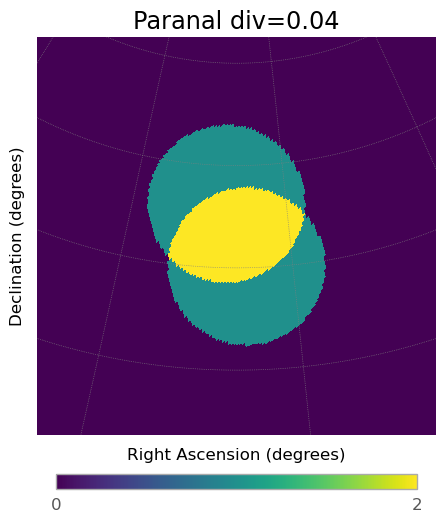

2it [00:00,  6.63it/s]
2it [00:00,  6.17it/s]


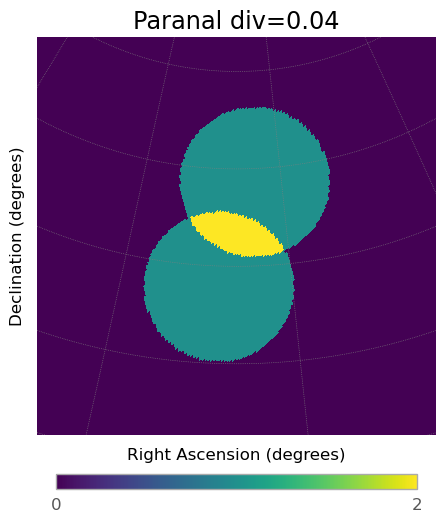

In [12]:
array.multiplicity_plot()
array_2.multiplicity_plot()

In [13]:
array.update_frame(time = '2024-02-20T00:00', verbose=True)
array.update_frame(delta_t = 5*u.min, verbose=True)
array_2.update_frame(time = '2024-02-20T00:00', verbose=True)
array_2.update_frame(delta_t = 5*u.min, verbose=True)

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:05:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:05:00.000




Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:25:00.000


2it [00:00,  6.86it/s]


(71.31373191653633, 1.3058109599117322)


2it [00:00,  6.43it/s]
2it [00:00,  6.21it/s]


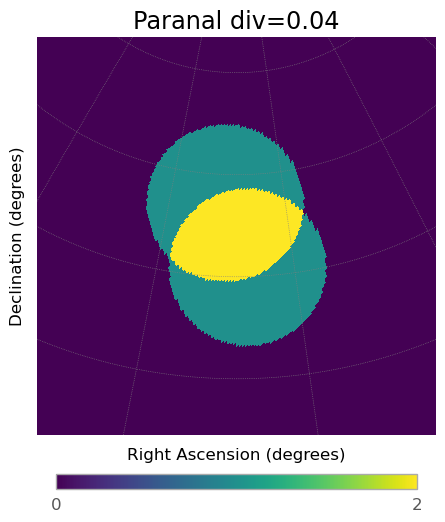



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:45:00.000


2it [00:00,  7.19it/s]


(71.78583459196761, 1.297771282426014)


2it [00:00,  7.32it/s]
2it [00:00,  6.45it/s]


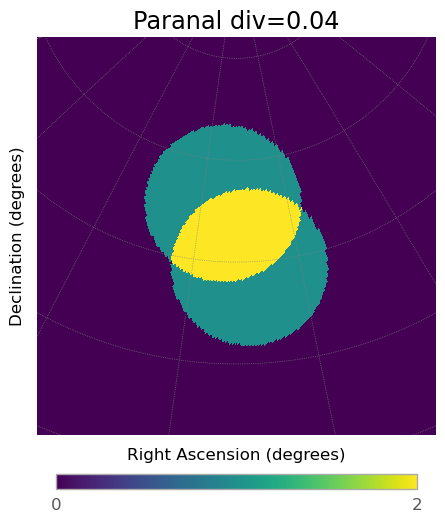



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:05:00.000


2it [00:00,  7.19it/s]


(72.0481138560961, 1.291408809610484)


2it [00:00,  7.26it/s]
2it [00:00,  6.54it/s]


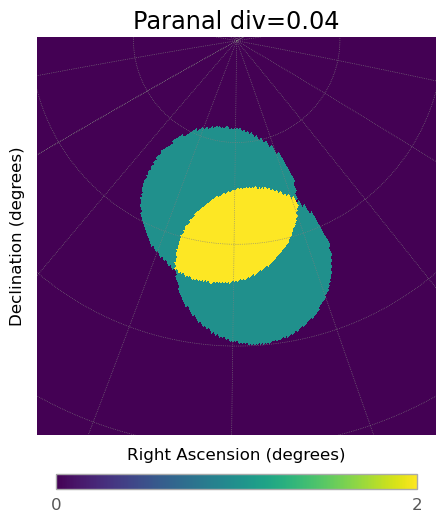



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:25:00.000


2it [00:00,  7.18it/s]


(72.27105123060531, 1.289239702413355)


2it [00:00,  6.90it/s]
2it [00:00,  4.86it/s]


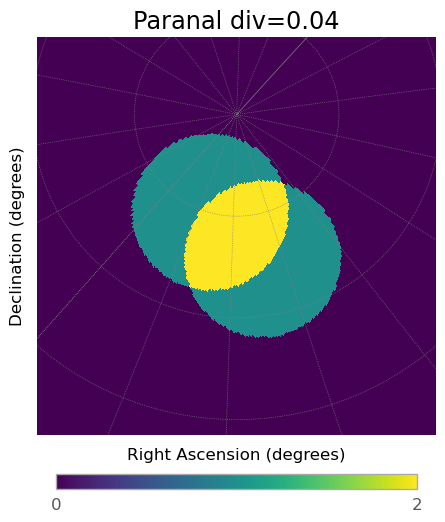



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:45:00.000


2it [00:00,  7.28it/s]


(72.28416519381175, 1.2877358490566038)


2it [00:00,  7.34it/s]
2it [00:00,  4.80it/s]


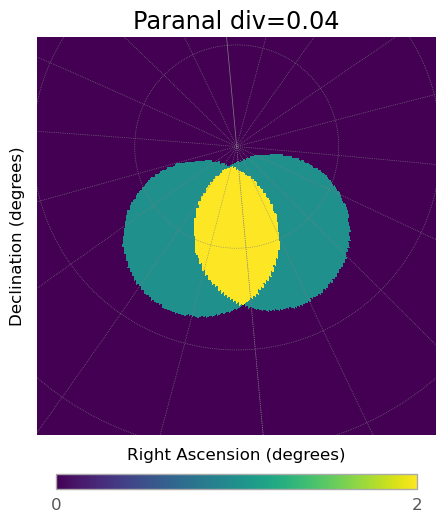



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:05:00.000


2it [00:00,  6.63it/s]


(72.24482330419247, 1.2904338355418405)


2it [00:00,  6.93it/s]
2it [00:00,  6.18it/s]


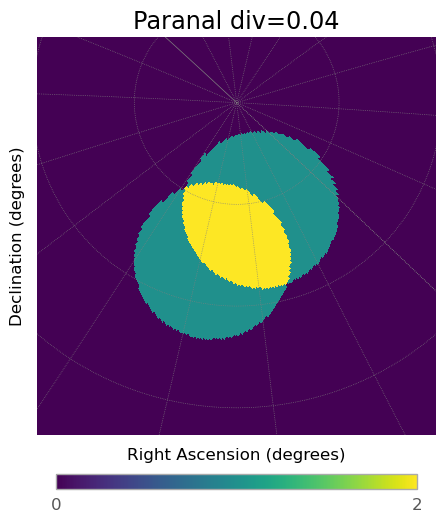

In [14]:
obs_h=2
for dt in range(int(obs_h*3)): 
    print('\n')
    initial_pointing_dir=array.get_pointing_coord(icrs=True)
    array.update_frame(delta_t = 20*u.min, verbose=True)
    new_frame=array.frame.altaz
    star_altaz=star.transform_to(new_frame)
    #print(array.table[0])
    if star_altaz.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    else:
        print(array.hFoV(return_multiplicity=True))
        array.multiplicity_plot()



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:25:00.000


2it [00:00,  7.34it/s]


(72.24482330419247, 1.2904338355418405)


2it [00:00,  7.40it/s]
2it [00:00,  5.18it/s]


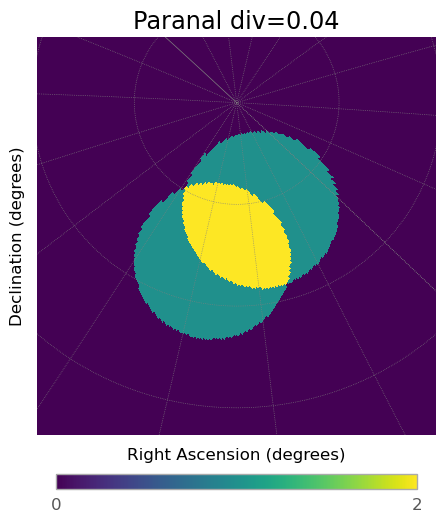



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:45:00.000


2it [00:00,  7.27it/s]


(72.24482330419247, 1.2904338355418405)


2it [00:00,  7.28it/s]
2it [00:00,  6.32it/s]


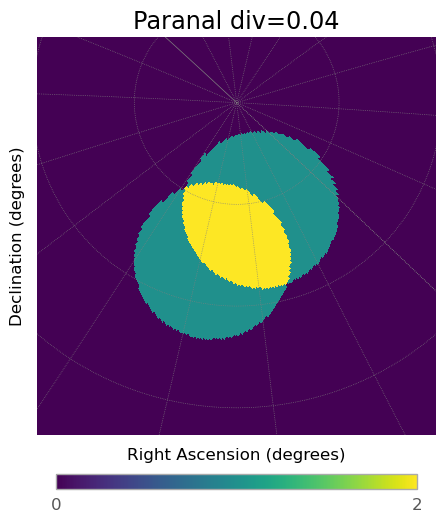



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:05:00.000


2it [00:00,  7.03it/s]


(72.24482330419247, 1.2904338355418405)


2it [00:00,  7.25it/s]
2it [00:00,  6.49it/s]


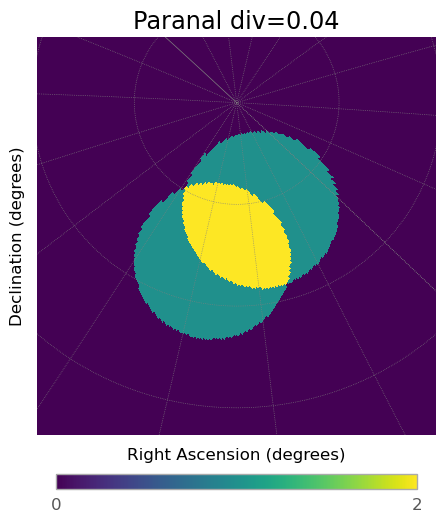



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:25:00.000


2it [00:00,  7.36it/s]


(72.24482330419247, 1.2904338355418405)


2it [00:00,  7.46it/s]
2it [00:00,  6.48it/s]


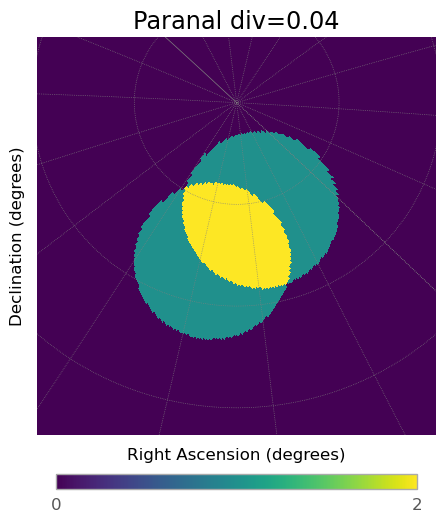



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:45:00.000


2it [00:00,  7.28it/s]


(72.24482330419247, 1.2904338355418405)


2it [00:00,  7.45it/s]
2it [00:00,  6.52it/s]


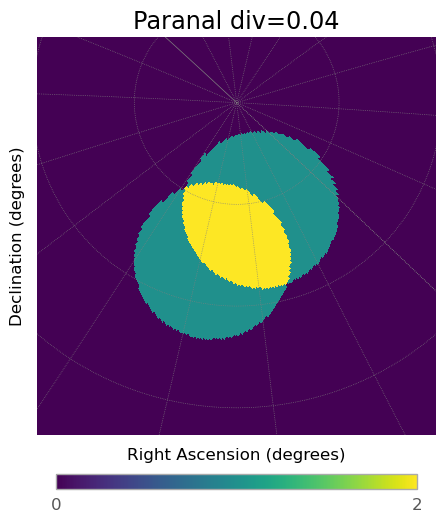



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:05:00.000


2it [00:00,  7.53it/s]


(72.24482330419247, 1.2904338355418405)


2it [00:00,  7.62it/s]
2it [00:00,  6.55it/s]


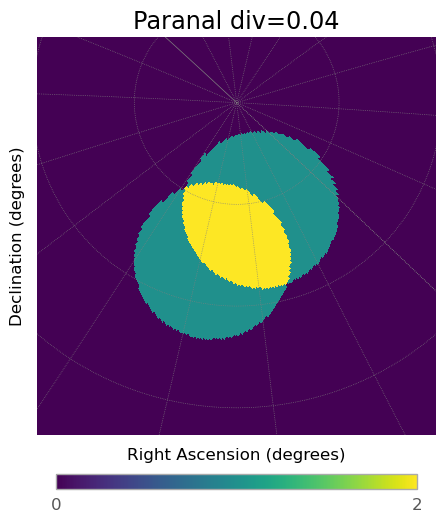

In [15]:

obs_h=2
for dt in range(int(obs_h*3)): 
    print('\n')
    initial_pointing_dir=array_2.get_pointing_coord(icrs=True)
    array_2.update_frame(delta_t = 20*u.min, verbose=True)
    new_frame=array_2.frame.altaz
    star_altaz_2=star_2.transform_to(new_frame)
    #print(array.table[0])
    if star_altaz_2.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    else:
        print(array.hFoV(return_multiplicity=True))
        array.multiplicity_plot()



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:25:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:25:00.000


2it [00:00,  6.66it/s]
2it [00:00,  7.52it/s]


(100.49230005083079, 1.8551481143155422)


2it [00:00,  7.64it/s]
2it [00:00,  7.55it/s]
2it [00:00,  5.61it/s]


9.788470801535192


2it [00:00,  7.50it/s]


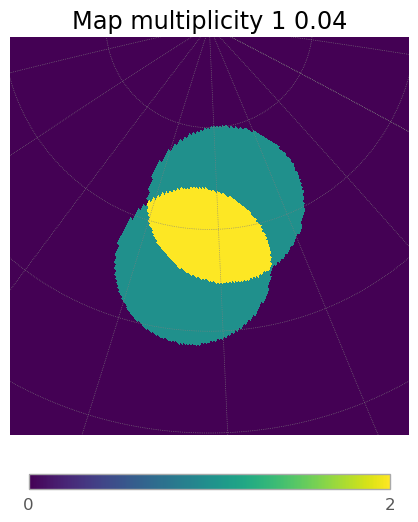

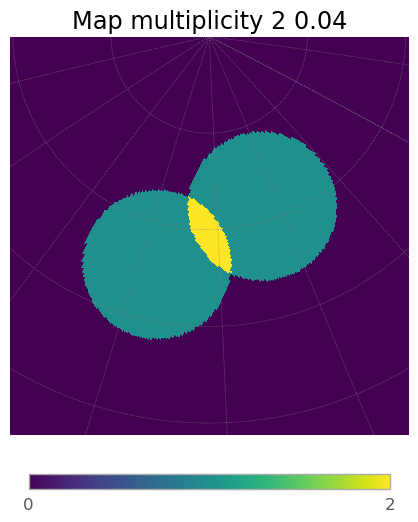

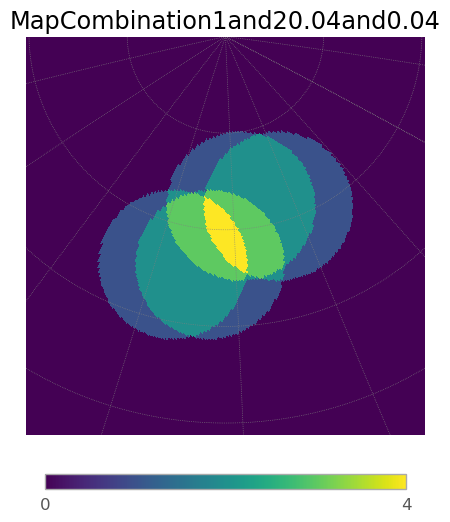

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:45:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:45:00.000


2it [00:00,  6.95it/s]
2it [00:00,  7.20it/s]


(99.98085548578024, 1.8616211962224554)


2it [00:00,  7.30it/s]
2it [00:00,  7.32it/s]
2it [00:00,  6.37it/s]


9.774939705268515


2it [00:00,  7.28it/s]


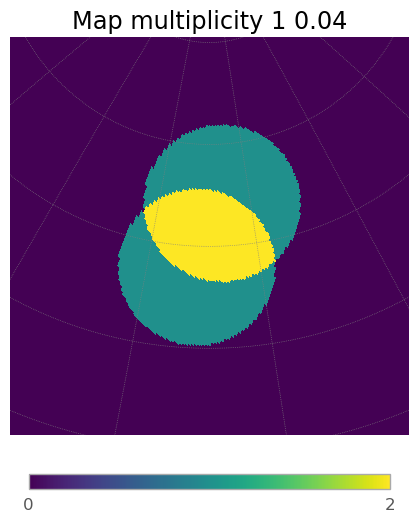

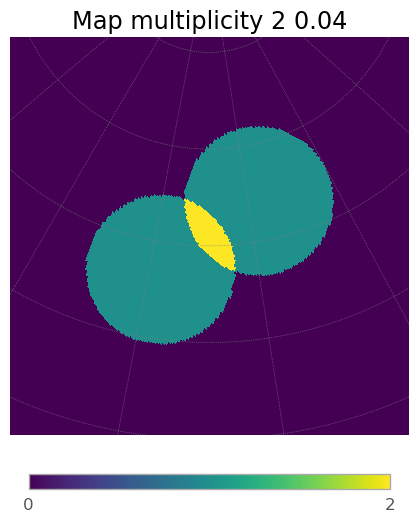

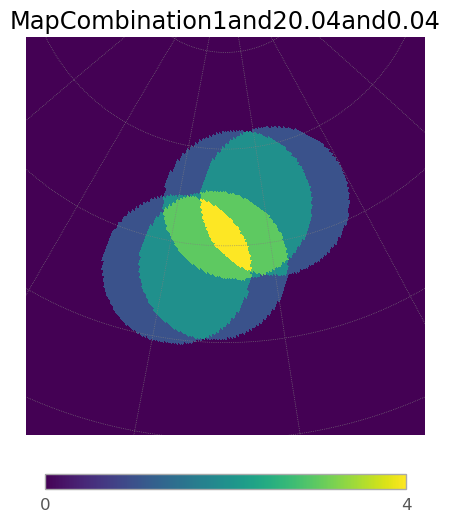

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:05:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:05:00.000


2it [00:00,  6.81it/s]
2it [00:00,  6.71it/s]


(99.44318299431684, 1.8714229196887775)


2it [00:00,  7.28it/s]
2it [00:00,  6.86it/s]
2it [00:00,  5.30it/s]


9.755229279734603


2it [00:00,  6.76it/s]


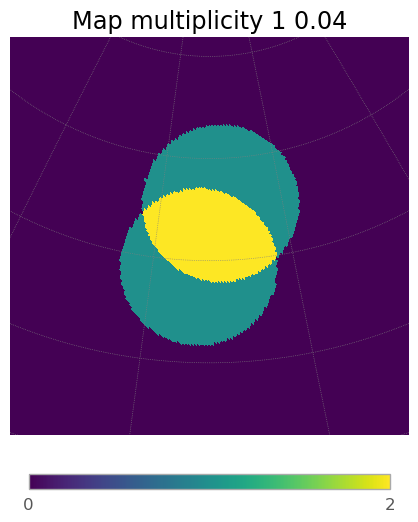

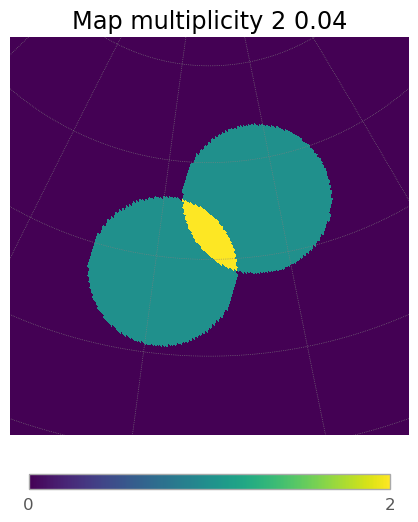

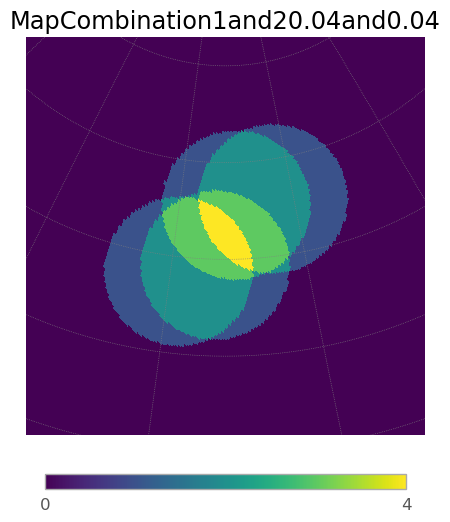

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:25:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:25:00.000


2it [00:00,  6.03it/s]
2it [00:00,  7.02it/s]


(98.82682672361489, 1.8845541401273886)


2it [00:00,  6.86it/s]
2it [00:00,  7.04it/s]
2it [00:00,  6.63it/s]


9.737640059926362


2it [00:00,  7.11it/s]


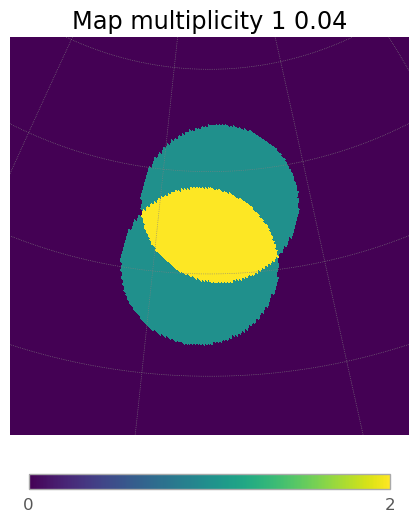

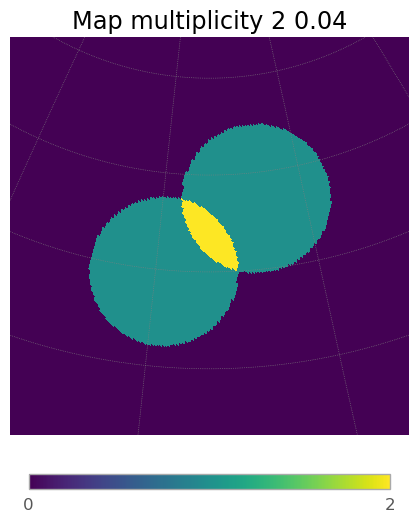

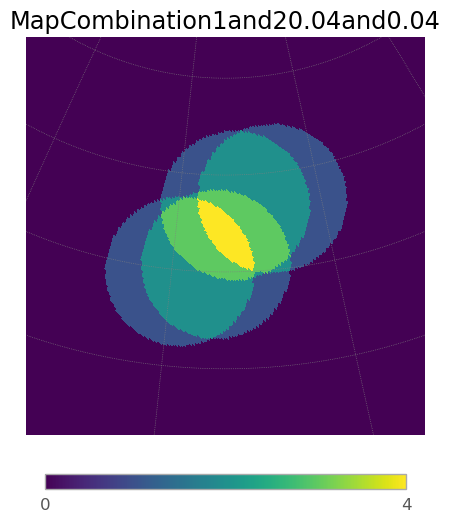

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:45:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:45:00.000


2it [00:00,  6.58it/s]
2it [00:00,  7.42it/s]


(98.14490063688082, 1.8971138428647782)


2it [00:00,  7.39it/s]
2it [00:00,  7.33it/s]
2it [00:00,  5.84it/s]


9.710246966031445


2it [00:00,  7.08it/s]


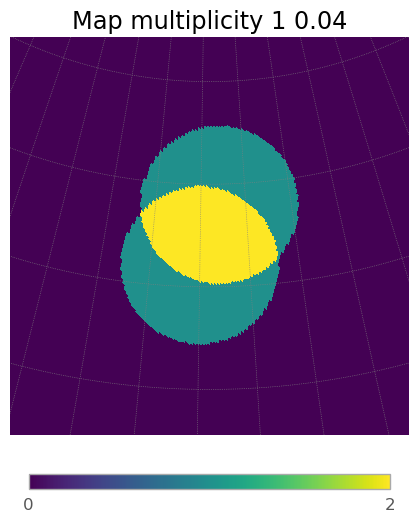

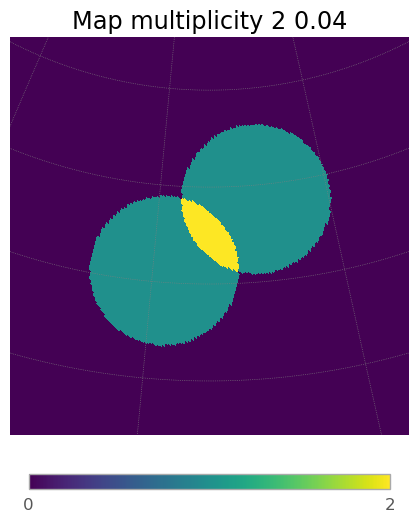

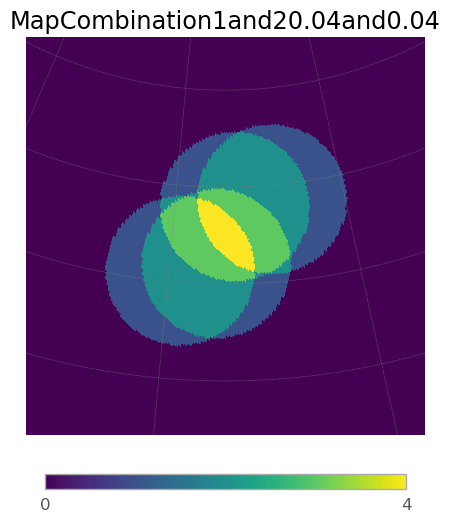

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T04:05:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T04:05:00.000


2it [00:00,  5.79it/s]
2it [00:00,  6.68it/s]


(97.26626510205037, 1.9160037751112309)


2it [00:00,  7.00it/s]
2it [00:00,  7.41it/s]
2it [00:00,  6.28it/s]


9.684030586685441


2it [00:00,  7.19it/s]


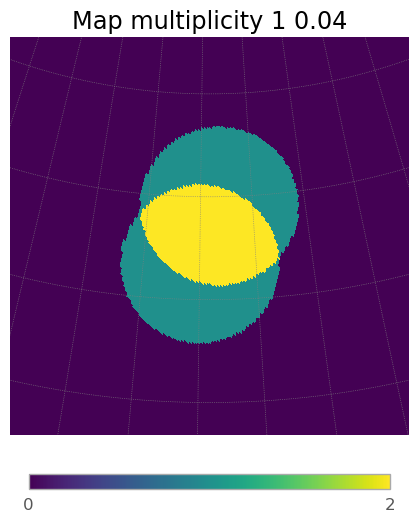

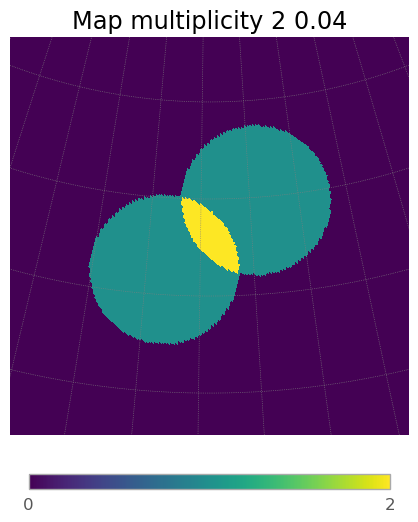

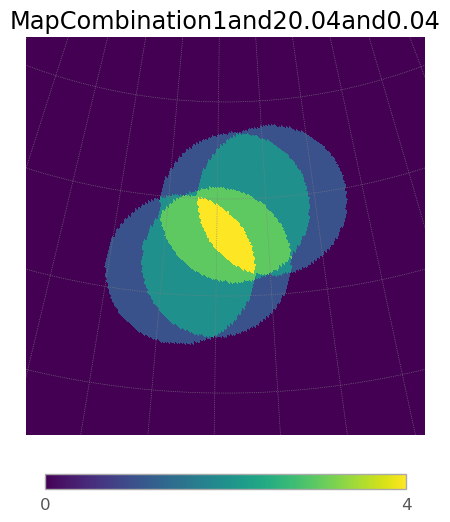

None


In [16]:


obs_h=2
for dt in range(int(obs_h*3)): 
    print('\n')
    initial_pointing_dir=array.get_pointing_coord(icrs=True)
    initial_pointing_dir_2=array_2.get_pointing_coord(icrs=True)
    array_2.update_frame(delta_t = 20*u.min, verbose=True)
    array.update_frame(delta_t = 20*u.min, verbose=True)
    new_frame_2=array_2.frame.altaz
    new_frame=array.frame.altaz
    star_altaz_2=star_2.transform_to(new_frame)
    star_altaz=star.transform_to(new_frame)
    #print(array.table[0])
    if star_altaz_2.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    if star_altaz.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    else:
        
        print(array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True))
        print(array.multiplicity_plot_2_div(array_2))





## COMBINING BOTH OF THEM

## DIV 0.04

In [17]:
array.divergent_pointing(0.04)
array_2.divergent_pointing(0.04)
array.update_frame(time = '2024-02-20T00:00')
array_2.update_frame(time = '2024-02-20T00:00')
print(array.frame.t_obs)
fov_combination, m_ave_combination = array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)
print(f"The first value in the array is {array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)}")
hFoV_combination = [fov_combination]
mAve_combination = [ m_ave_combination]
t = [0]
alt_1 = [array.pointing["alt"].value]
alt_2 = [array_2.pointing["alt"].value]
for i in range(44):
    t.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    array_2.update_frame(delta_t = 5*u.min)
    print(array.frame.t_obs)
    print(array_2.frame.t_obs)
    fov_combination, m_ave_combination = array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)
    hFoV_combination.append(fov_combination)
    mAve_combination.append(m_ave_combination)
    alt_1.append(array.pointing["alt"].value)
    alt_2.append(array_2.pointing["alt"].value)

2024-02-20T00:00:00.000


2it [00:00,  6.13it/s]
2it [00:00,  6.90it/s]
2it [00:00,  6.52it/s]
2it [00:00,  7.54it/s]


The first value in the array is (96.66302279455485, 1.9263329263329263)
2024-02-20T00:05:00.000
2024-02-20T00:05:00.000


2it [00:00,  6.50it/s]
2it [00:00,  7.31it/s]


2024-02-20T00:10:00.000
2024-02-20T00:10:00.000


2it [00:00,  7.03it/s]
2it [00:00,  7.48it/s]


2024-02-20T00:15:00.000
2024-02-20T00:15:00.000


2it [00:00,  6.93it/s]
2it [00:00,  7.34it/s]


2024-02-20T00:20:00.000
2024-02-20T00:20:00.000


2it [00:00,  6.07it/s]
2it [00:00,  7.55it/s]


2024-02-20T00:25:00.000
2024-02-20T00:25:00.000


2it [00:00,  6.76it/s]
2it [00:00,  7.52it/s]


2024-02-20T00:30:00.000
2024-02-20T00:30:00.000


2it [00:00,  6.36it/s]
2it [00:00,  7.59it/s]


2024-02-20T00:35:00.000
2024-02-20T00:35:00.000


2it [00:00,  6.69it/s]
2it [00:00,  6.93it/s]


2024-02-20T00:40:00.000
2024-02-20T00:40:00.000


2it [00:00,  6.49it/s]
2it [00:00,  7.17it/s]


2024-02-20T00:45:00.000
2024-02-20T00:45:00.000


2it [00:00,  6.43it/s]
2it [00:00,  6.79it/s]


2024-02-20T00:50:00.000
2024-02-20T00:50:00.000


2it [00:00,  5.19it/s]
2it [00:00,  7.04it/s]


2024-02-20T00:55:00.000
2024-02-20T00:55:00.000


2it [00:00,  6.08it/s]
2it [00:00,  7.27it/s]


2024-02-20T01:00:00.000
2024-02-20T01:00:00.000


2it [00:00,  6.49it/s]
2it [00:00,  7.11it/s]


2024-02-20T01:05:00.000
2024-02-20T01:05:00.000


2it [00:00,  6.67it/s]
2it [00:00,  7.15it/s]


2024-02-20T01:10:00.000
2024-02-20T01:10:00.000


2it [00:00,  6.57it/s]
2it [00:00,  6.88it/s]


2024-02-20T01:15:00.000
2024-02-20T01:15:00.000


2it [00:00,  6.70it/s]
2it [00:00,  7.22it/s]


2024-02-20T01:20:00.000
2024-02-20T01:20:00.000


2it [00:00,  6.45it/s]
2it [00:00,  7.29it/s]


2024-02-20T01:25:00.000
2024-02-20T01:25:00.000


2it [00:00,  6.81it/s]
2it [00:00,  6.84it/s]


2024-02-20T01:30:00.000
2024-02-20T01:30:00.000


2it [00:00,  6.64it/s]
2it [00:00,  7.30it/s]


2024-02-20T01:35:00.000
2024-02-20T01:35:00.000


2it [00:00,  6.63it/s]
2it [00:00,  6.88it/s]


2024-02-20T01:40:00.000
2024-02-20T01:40:00.000


2it [00:00,  5.39it/s]
2it [00:00,  4.57it/s]


2024-02-20T01:45:00.000
2024-02-20T01:45:00.000


2it [00:00,  5.08it/s]
2it [00:00,  6.89it/s]


2024-02-20T01:50:00.000
2024-02-20T01:50:00.000


2it [00:00,  6.22it/s]
2it [00:00,  7.26it/s]


2024-02-20T01:55:00.000
2024-02-20T01:55:00.000


2it [00:00,  6.18it/s]
2it [00:00,  7.28it/s]


2024-02-20T02:00:00.000
2024-02-20T02:00:00.000


2it [00:00,  5.64it/s]
2it [00:00,  7.12it/s]


2024-02-20T02:05:00.000
2024-02-20T02:05:00.000


2it [00:00,  6.43it/s]
2it [00:00,  7.16it/s]


2024-02-20T02:10:00.000
2024-02-20T02:10:00.000


2it [00:00,  5.87it/s]
2it [00:00,  7.00it/s]


2024-02-20T02:15:00.000
2024-02-20T02:15:00.000


2it [00:00,  5.99it/s]
2it [00:00,  7.31it/s]


2024-02-20T02:20:00.000
2024-02-20T02:20:00.000


2it [00:00,  6.54it/s]
2it [00:00,  7.51it/s]


2024-02-20T02:25:00.000
2024-02-20T02:25:00.000


2it [00:00,  6.53it/s]
2it [00:00,  7.58it/s]


2024-02-20T02:30:00.000
2024-02-20T02:30:00.000


2it [00:00,  6.70it/s]
2it [00:00,  7.08it/s]


2024-02-20T02:35:00.000
2024-02-20T02:35:00.000


2it [00:00,  6.62it/s]
2it [00:00,  7.33it/s]


2024-02-20T02:40:00.000
2024-02-20T02:40:00.000


2it [00:00,  6.90it/s]
2it [00:00,  7.28it/s]


2024-02-20T02:45:00.000
2024-02-20T02:45:00.000


2it [00:00,  6.56it/s]
2it [00:00,  7.50it/s]


2024-02-20T02:50:00.000
2024-02-20T02:50:00.000


2it [00:00,  6.92it/s]
2it [00:00,  7.65it/s]


2024-02-20T02:55:00.000
2024-02-20T02:55:00.000


2it [00:00,  6.29it/s]
2it [00:00,  7.40it/s]


2024-02-20T03:00:00.000
2024-02-20T03:00:00.000


2it [00:00,  6.59it/s]
2it [00:00,  7.43it/s]


2024-02-20T03:05:00.000
2024-02-20T03:05:00.000


2it [00:00,  6.70it/s]
2it [00:00,  7.35it/s]


2024-02-20T03:10:00.000
2024-02-20T03:10:00.000


2it [00:00,  6.56it/s]
2it [00:00,  7.27it/s]


2024-02-20T03:15:00.000
2024-02-20T03:15:00.000


2it [00:00,  6.71it/s]
2it [00:00,  7.33it/s]


2024-02-20T03:20:00.000
2024-02-20T03:20:00.000


2it [00:00,  6.21it/s]
2it [00:00,  7.28it/s]


2024-02-20T03:25:00.000
2024-02-20T03:25:00.000


2it [00:00,  5.69it/s]
2it [00:00,  7.25it/s]


2024-02-20T03:30:00.000
2024-02-20T03:30:00.000


2it [00:00,  6.46it/s]
2it [00:00,  7.33it/s]


2024-02-20T03:35:00.000
2024-02-20T03:35:00.000


2it [00:00,  6.68it/s]
2it [00:00,  7.14it/s]


2024-02-20T03:40:00.000
2024-02-20T03:40:00.000


2it [00:00,  6.67it/s]
2it [00:00,  6.54it/s]


## DIV 0.01

In [18]:
array.divergent_pointing(0.01)
array_2.divergent_pointing(0.01)
array.update_frame(time = '2024-02-20T00:00')
array_2.update_frame(time = '2024-02-20T00:00')
print(array.frame.t_obs)
fov_combination_01, m_ave_combination_01 = array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)
print(f"The first value in the array is {array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)}")
hFoV_combination_01 = [fov_combination_01]
mAve_combination_01 = [ m_ave_combination_01]
t_01 = [0]
alt_1_01 = [array.pointing["alt"].value]
alt_2_01 = [array_2.pointing["alt"].value]
for i in range(44):
    t_01.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    array_2.update_frame(delta_t = 5*u.min)
    print(array.frame.t_obs)
    print(array_2.frame.t_obs)
    fov_combination_01, m_ave_combination_01 = array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)
    hFoV_combination_01.append(fov_combination_01)
    mAve_combination_01.append(m_ave_combination_01)
    alt_1_01.append(array.pointing["alt"].value)
    alt_2_01.append(array_2.pointing["alt"].value)

2024-02-20T00:00:00.000


2it [00:00,  5.81it/s]
2it [00:00,  7.06it/s]
2it [00:00,  6.33it/s]
2it [00:00,  7.03it/s]


The first value in the array is (58.50138986385961, 3.182470298139431)
2024-02-20T00:05:00.000
2024-02-20T00:05:00.000


2it [00:00,  6.23it/s]
2it [00:00,  6.80it/s]


2024-02-20T00:10:00.000
2024-02-20T00:10:00.000


2it [00:00,  6.65it/s]
2it [00:00,  6.77it/s]


2024-02-20T00:15:00.000
2024-02-20T00:15:00.000


2it [00:00,  6.32it/s]
2it [00:00,  6.77it/s]


2024-02-20T00:20:00.000
2024-02-20T00:20:00.000


2it [00:00,  5.38it/s]
2it [00:00,  7.21it/s]


2024-02-20T00:25:00.000
2024-02-20T00:25:00.000


2it [00:00,  6.32it/s]
2it [00:00,  7.29it/s]


2024-02-20T00:30:00.000
2024-02-20T00:30:00.000


2it [00:00,  6.41it/s]
2it [00:00,  7.36it/s]


2024-02-20T00:35:00.000
2024-02-20T00:35:00.000


2it [00:00,  6.44it/s]
2it [00:00,  7.00it/s]


2024-02-20T00:40:00.000
2024-02-20T00:40:00.000


2it [00:00,  5.59it/s]
2it [00:00,  7.43it/s]


2024-02-20T00:45:00.000
2024-02-20T00:45:00.000


2it [00:00,  7.01it/s]
2it [00:00,  7.31it/s]


2024-02-20T00:50:00.000
2024-02-20T00:50:00.000


2it [00:00,  6.82it/s]
2it [00:00,  6.04it/s]


2024-02-20T00:55:00.000
2024-02-20T00:55:00.000


2it [00:00,  6.62it/s]
2it [00:00,  7.32it/s]


2024-02-20T01:00:00.000
2024-02-20T01:00:00.000


2it [00:00,  6.77it/s]
2it [00:00,  6.94it/s]


2024-02-20T01:05:00.000
2024-02-20T01:05:00.000


2it [00:00,  6.37it/s]
2it [00:00,  7.39it/s]


2024-02-20T01:10:00.000
2024-02-20T01:10:00.000


2it [00:00,  6.13it/s]
2it [00:00,  7.60it/s]


2024-02-20T01:15:00.000
2024-02-20T01:15:00.000


2it [00:00,  6.68it/s]
2it [00:00,  7.52it/s]


2024-02-20T01:20:00.000
2024-02-20T01:20:00.000


2it [00:00,  6.70it/s]
2it [00:00,  7.44it/s]


2024-02-20T01:25:00.000
2024-02-20T01:25:00.000


2it [00:00,  6.81it/s]
2it [00:00,  6.60it/s]


2024-02-20T01:30:00.000
2024-02-20T01:30:00.000


2it [00:00,  6.61it/s]
2it [00:00,  7.10it/s]


2024-02-20T01:35:00.000
2024-02-20T01:35:00.000


2it [00:00,  6.49it/s]
2it [00:00,  7.40it/s]


2024-02-20T01:40:00.000
2024-02-20T01:40:00.000


2it [00:00,  6.63it/s]
2it [00:00,  7.36it/s]


2024-02-20T01:45:00.000
2024-02-20T01:45:00.000


2it [00:00,  6.52it/s]
2it [00:00,  7.13it/s]


2024-02-20T01:50:00.000
2024-02-20T01:50:00.000


2it [00:00,  6.46it/s]
2it [00:00,  6.95it/s]


2024-02-20T01:55:00.000
2024-02-20T01:55:00.000


2it [00:00,  6.54it/s]
2it [00:00,  7.01it/s]


2024-02-20T02:00:00.000
2024-02-20T02:00:00.000


2it [00:00,  6.47it/s]
2it [00:00,  7.08it/s]


2024-02-20T02:05:00.000
2024-02-20T02:05:00.000


2it [00:00,  5.89it/s]
2it [00:00,  7.01it/s]


2024-02-20T02:10:00.000
2024-02-20T02:10:00.000


2it [00:00,  6.17it/s]
2it [00:00,  7.02it/s]


2024-02-20T02:15:00.000
2024-02-20T02:15:00.000


2it [00:00,  6.54it/s]
2it [00:00,  7.16it/s]


2024-02-20T02:20:00.000
2024-02-20T02:20:00.000


2it [00:00,  6.36it/s]
2it [00:00,  7.23it/s]


2024-02-20T02:25:00.000
2024-02-20T02:25:00.000


2it [00:00,  5.31it/s]
2it [00:00,  7.28it/s]


2024-02-20T02:30:00.000
2024-02-20T02:30:00.000


2it [00:00,  6.86it/s]
2it [00:00,  7.14it/s]


2024-02-20T02:35:00.000
2024-02-20T02:35:00.000


2it [00:00,  6.73it/s]
2it [00:00,  6.49it/s]


2024-02-20T02:40:00.000
2024-02-20T02:40:00.000


2it [00:00,  6.47it/s]
2it [00:00,  7.07it/s]


2024-02-20T02:45:00.000
2024-02-20T02:45:00.000


2it [00:00,  6.73it/s]
2it [00:00,  7.21it/s]


2024-02-20T02:50:00.000
2024-02-20T02:50:00.000


2it [00:00,  6.40it/s]
2it [00:00,  7.02it/s]


2024-02-20T02:55:00.000
2024-02-20T02:55:00.000


2it [00:00,  6.08it/s]
2it [00:00,  7.09it/s]


2024-02-20T03:00:00.000
2024-02-20T03:00:00.000


2it [00:00,  6.51it/s]
2it [00:00,  7.19it/s]


2024-02-20T03:05:00.000
2024-02-20T03:05:00.000


2it [00:00,  6.82it/s]
2it [00:00,  7.65it/s]


2024-02-20T03:10:00.000
2024-02-20T03:10:00.000


2it [00:00,  6.67it/s]
2it [00:00,  7.48it/s]


2024-02-20T03:15:00.000
2024-02-20T03:15:00.000


2it [00:00,  5.72it/s]
2it [00:00,  7.57it/s]


2024-02-20T03:20:00.000
2024-02-20T03:20:00.000


2it [00:00,  6.97it/s]
2it [00:00,  7.51it/s]


2024-02-20T03:25:00.000
2024-02-20T03:25:00.000


2it [00:00,  6.44it/s]
2it [00:00,  6.65it/s]


2024-02-20T03:30:00.000
2024-02-20T03:30:00.000


2it [00:00,  6.71it/s]
2it [00:00,  7.48it/s]


2024-02-20T03:35:00.000
2024-02-20T03:35:00.000


2it [00:00,  6.61it/s]
2it [00:00,  6.78it/s]


2024-02-20T03:40:00.000
2024-02-20T03:40:00.000


2it [00:00,  6.90it/s]
2it [00:00,  7.52it/s]


## DIV 0.08

In [19]:
array.divergent_pointing(0.08)
array_2.divergent_pointing(0.04)
array.update_frame(time = '2024-02-20T00:00')
array_2.update_frame(time = '2024-02-20T00:00')
print(array.frame.t_obs)
fov_combination_09, m_ave_combination_09 = array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)
print(f"The first value in the array is {array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)}")
hFoV_combination_09 = [fov_combination_09]
mAve_combination_09 = [ m_ave_combination_09]
t_09 = [0]
alt_1_09 = [array.pointing["alt"].value]
alt_2_09 = [array_2.pointing["alt"].value]
for i in range(44):
    t_09.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    array_2.update_frame(delta_t = 5*u.min)
    print(array.frame.t_obs)
    print(array_2.frame.t_obs)
    fov_combination_09, m_ave_combination_09 = array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)
    hFoV_combination_09.append(fov_combination_09)
    mAve_combination_09.append(m_ave_combination_09)
    alt_1_09.append(array.pointing["alt"].value)
    alt_2_09.append(array_2.pointing["alt"].value)

2024-02-20T00:00:00.000


2it [00:00,  6.53it/s]
2it [00:00,  6.49it/s]
2it [00:00,  6.56it/s]
2it [00:00,  6.91it/s]


The first value in the array is (111.73096651873658, 1.6651408450704226)
2024-02-20T00:05:00.000
2024-02-20T00:05:00.000


2it [00:00,  5.31it/s]
2it [00:00,  6.98it/s]


2024-02-20T00:10:00.000
2024-02-20T00:10:00.000


2it [00:00,  4.52it/s]
2it [00:00,  6.98it/s]


2024-02-20T00:15:00.000
2024-02-20T00:15:00.000


2it [00:00,  5.98it/s]
2it [00:00,  6.84it/s]


2024-02-20T00:20:00.000
2024-02-20T00:20:00.000


2it [00:00,  6.13it/s]
2it [00:00,  6.64it/s]


2024-02-20T00:25:00.000
2024-02-20T00:25:00.000


2it [00:00,  4.20it/s]
2it [00:00,  6.30it/s]


2024-02-20T00:30:00.000
2024-02-20T00:30:00.000


2it [00:00,  5.46it/s]
2it [00:00,  6.37it/s]


2024-02-20T00:35:00.000
2024-02-20T00:35:00.000


2it [00:00,  6.28it/s]
2it [00:00,  6.88it/s]


2024-02-20T00:40:00.000
2024-02-20T00:40:00.000


2it [00:00,  5.09it/s]
2it [00:00,  6.85it/s]


2024-02-20T00:45:00.000
2024-02-20T00:45:00.000


2it [00:00,  5.49it/s]
2it [00:00,  6.85it/s]


2024-02-20T00:50:00.000
2024-02-20T00:50:00.000


2it [00:00,  5.32it/s]
2it [00:00,  6.69it/s]


2024-02-20T00:55:00.000
2024-02-20T00:55:00.000


2it [00:00,  6.15it/s]
2it [00:00,  7.11it/s]


2024-02-20T01:00:00.000
2024-02-20T01:00:00.000


2it [00:00,  6.34it/s]
2it [00:00,  6.76it/s]


2024-02-20T01:05:00.000
2024-02-20T01:05:00.000


2it [00:00,  5.87it/s]
2it [00:00,  6.67it/s]


2024-02-20T01:10:00.000
2024-02-20T01:10:00.000


2it [00:00,  6.42it/s]
2it [00:00,  7.25it/s]


2024-02-20T01:15:00.000
2024-02-20T01:15:00.000


2it [00:00,  6.74it/s]
2it [00:00,  6.94it/s]


2024-02-20T01:20:00.000
2024-02-20T01:20:00.000


2it [00:00,  6.79it/s]
2it [00:00,  6.67it/s]


2024-02-20T01:25:00.000
2024-02-20T01:25:00.000


2it [00:00,  6.21it/s]
2it [00:00,  7.16it/s]


2024-02-20T01:30:00.000
2024-02-20T01:30:00.000


2it [00:00,  5.25it/s]
2it [00:00,  7.24it/s]


2024-02-20T01:35:00.000
2024-02-20T01:35:00.000


2it [00:00,  6.76it/s]
2it [00:00,  7.56it/s]


2024-02-20T01:40:00.000
2024-02-20T01:40:00.000


2it [00:00,  5.42it/s]
2it [00:00,  6.97it/s]


2024-02-20T01:45:00.000
2024-02-20T01:45:00.000


2it [00:00,  6.08it/s]
2it [00:00,  7.05it/s]


2024-02-20T01:50:00.000
2024-02-20T01:50:00.000


2it [00:00,  6.34it/s]
2it [00:00,  6.55it/s]


2024-02-20T01:55:00.000
2024-02-20T01:55:00.000


2it [00:00,  6.88it/s]
2it [00:00,  7.14it/s]


2024-02-20T02:00:00.000
2024-02-20T02:00:00.000


2it [00:00,  6.21it/s]
2it [00:00,  6.80it/s]


2024-02-20T02:05:00.000
2024-02-20T02:05:00.000


2it [00:00,  6.49it/s]
2it [00:00,  6.98it/s]


2024-02-20T02:10:00.000
2024-02-20T02:10:00.000


2it [00:00,  6.87it/s]
2it [00:00,  7.41it/s]


2024-02-20T02:15:00.000
2024-02-20T02:15:00.000


2it [00:00,  6.62it/s]
2it [00:00,  7.47it/s]


2024-02-20T02:20:00.000
2024-02-20T02:20:00.000


2it [00:00,  6.38it/s]
2it [00:00,  7.10it/s]


2024-02-20T02:25:00.000
2024-02-20T02:25:00.000


2it [00:00,  6.55it/s]
2it [00:00,  7.16it/s]


2024-02-20T02:30:00.000
2024-02-20T02:30:00.000


2it [00:00,  6.59it/s]
2it [00:00,  7.09it/s]


2024-02-20T02:35:00.000
2024-02-20T02:35:00.000


2it [00:00,  6.17it/s]
2it [00:00,  7.31it/s]


2024-02-20T02:40:00.000
2024-02-20T02:40:00.000


2it [00:00,  6.81it/s]
2it [00:00,  6.89it/s]


2024-02-20T02:45:00.000
2024-02-20T02:45:00.000


2it [00:00,  6.56it/s]
2it [00:00,  7.04it/s]


2024-02-20T02:50:00.000
2024-02-20T02:50:00.000


2it [00:00,  6.34it/s]
2it [00:00,  7.29it/s]


2024-02-20T02:55:00.000
2024-02-20T02:55:00.000


2it [00:00,  6.32it/s]
2it [00:00,  7.04it/s]


2024-02-20T03:00:00.000
2024-02-20T03:00:00.000


2it [00:00,  6.01it/s]
2it [00:00,  7.17it/s]


2024-02-20T03:05:00.000
2024-02-20T03:05:00.000


2it [00:00,  6.28it/s]
2it [00:00,  7.20it/s]


2024-02-20T03:10:00.000
2024-02-20T03:10:00.000


2it [00:00,  6.11it/s]
2it [00:00,  6.57it/s]


2024-02-20T03:15:00.000
2024-02-20T03:15:00.000


2it [00:00,  6.06it/s]
2it [00:00,  7.06it/s]


2024-02-20T03:20:00.000
2024-02-20T03:20:00.000


2it [00:00,  6.18it/s]
2it [00:00,  7.01it/s]


2024-02-20T03:25:00.000
2024-02-20T03:25:00.000


2it [00:00,  6.09it/s]
2it [00:00,  7.10it/s]


2024-02-20T03:30:00.000
2024-02-20T03:30:00.000


2it [00:00,  6.24it/s]
2it [00:00,  6.83it/s]


2024-02-20T03:35:00.000
2024-02-20T03:35:00.000


2it [00:00,  6.22it/s]
2it [00:00,  7.34it/s]


2024-02-20T03:40:00.000
2024-02-20T03:40:00.000


2it [00:00,  6.24it/s]
2it [00:00,  7.22it/s]


In [20]:
print( hFoV_combination)

[96.66302279455485, 96.96464394830261, 97.30560699166965, 97.62034210862383, 97.84327948313306, 98.15801460008724, 98.30226819535791, 98.60388934910567, 98.74814294437634, 99.03665013491768, 99.1546758037755, 99.43006903111042, 99.50875281034897, 99.75791811127102, 99.91528566974812, 99.87594378012885, 100.08576719143164, 100.15133700746377, 100.26936267632158, 100.26936267632158, 100.40050230838582, 100.3873883451794, 100.30870456594086, 100.34804645556012, 100.50541401403723, 100.49230005083079, 100.3873883451794, 100.3873883451794, 100.36116041876656, 100.49230005083079, 100.282476639528, 100.15133700746377, 100.13822304425733, 99.98085548578024, 99.98085548578024, 99.65300640561964, 99.60055055279393, 99.44318299431684, 99.2595875094269, 99.32515732545902, 99.1546758037755, 98.82682672361489, 98.68257312834422, 98.47274971704142, 98.21047045291294]


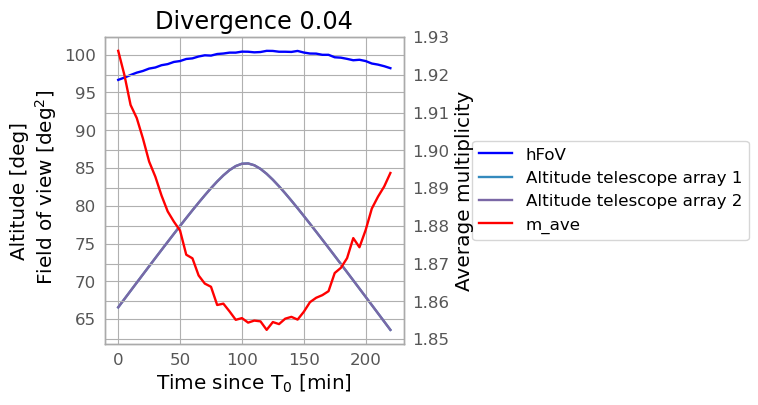

In [21]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV_combination, color="b", label="hFoV")
p2 = ax.plot(t, alt_1, label="Altitude telescope array 1")
p3 = ax.plot(t, alt_2, label="Altitude telescope array 2")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p4 = ax2.plot(t, mAve_combination, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
plt.title("Divergence 0.04")
ps = p1+p2+p3+p4
ax.legend(ps, [p.get_label() for p in ps], loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show(block=False)

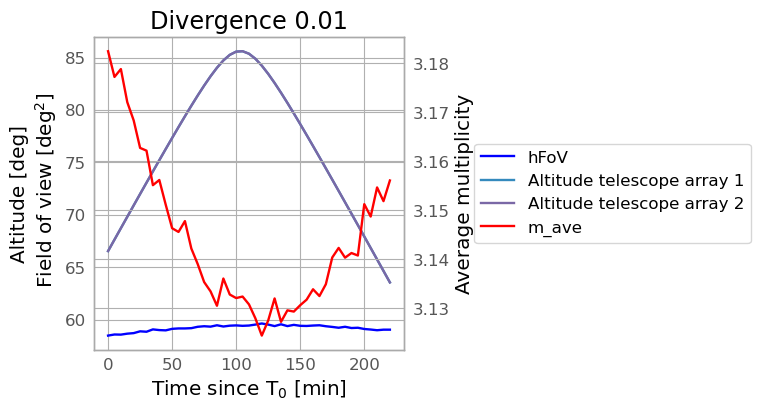

In [22]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t_01, hFoV_combination_01, color="b", label="hFoV")
p2 = ax.plot(t_01, alt_1_01, label="Altitude telescope array 1")
p3 = ax.plot(t_01, alt_2_01, label="Altitude telescope array 2")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p4 = ax2.plot(t_01, mAve_combination_01, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
plt.title("Divergence 0.01")
ps = p1+p2+p3+p4
ax.legend(ps, [p.get_label() for p in ps], loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show(block=False)

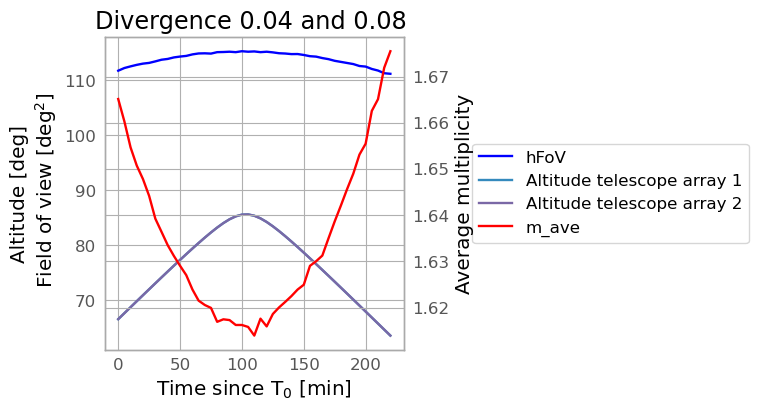

In [23]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t_09, hFoV_combination_09, color="b", label="hFoV")
p2 = ax.plot(t_09, alt_1_09, label="Altitude telescope array 1")
p3 = ax.plot(t_09, alt_2_09, label="Altitude telescope array 2")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p4 = ax2.plot(t_09, mAve_combination_09, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
plt.title("Divergence 0.04 and 0.08 ")
ps = p1+p2+p3+p4
ax.legend(ps, [p.get_label() for p in ps], loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show(block=False)



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T04:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T04:00:00.000


2it [00:00,  6.22it/s]
2it [00:00,  6.86it/s]


(109.56716258967654, 1.6983842010771992)


2it [00:00,  7.11it/s]
2it [00:00,  7.03it/s]
2it [00:00,  5.50it/s]


10.27660957290015


2it [00:00,  7.50it/s]


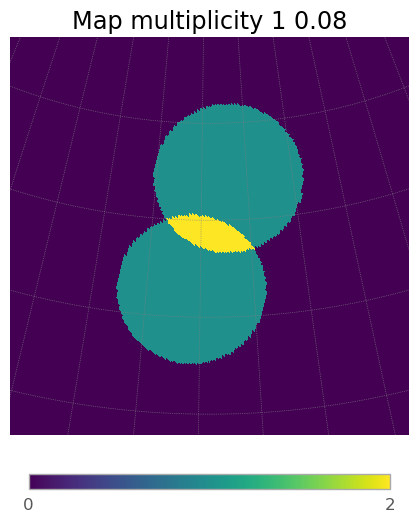

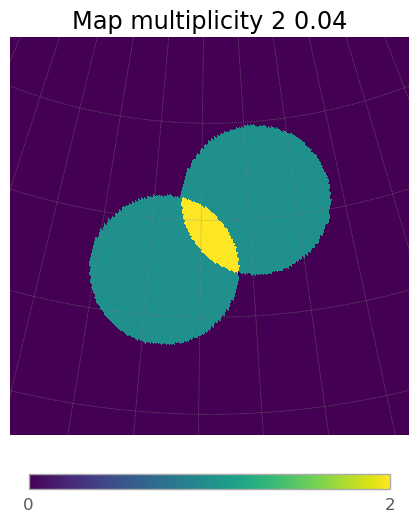

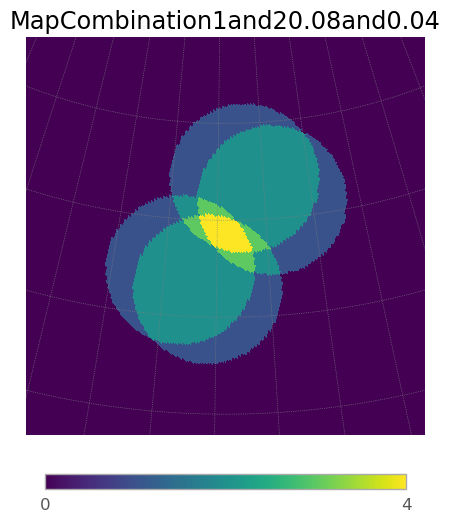

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T04:20:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T04:20:00.000


2it [00:00,  6.26it/s]
2it [00:00,  7.65it/s]


(107.91480322566706, 1.725969133552072)


2it [00:00,  7.32it/s]
2it [00:00,  7.44it/s]
2it [00:00,  6.26it/s]


10.240889353212154


2it [00:00,  6.47it/s]


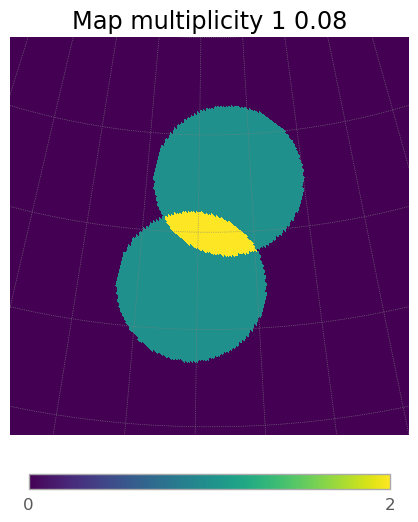

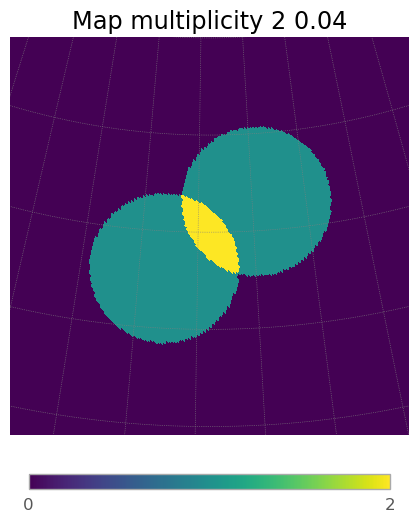

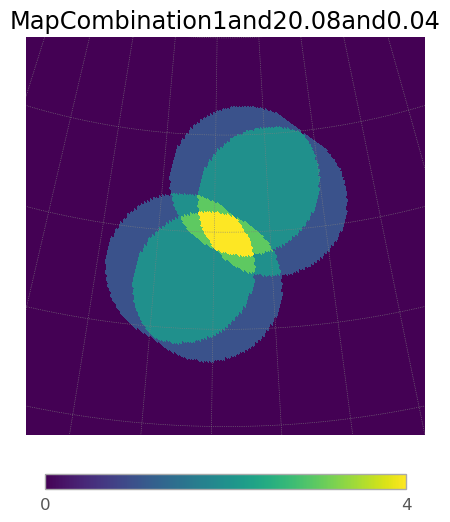

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T04:40:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T04:40:00.000


2it [00:00,  6.74it/s]
2it [00:00,  7.39it/s]


(106.0132785607355, 1.7568035625927758)


2it [00:00,  6.38it/s]
2it [00:00,  7.06it/s]
2it [00:00,  5.26it/s]


10.195692912911948


2it [00:00,  6.00it/s]


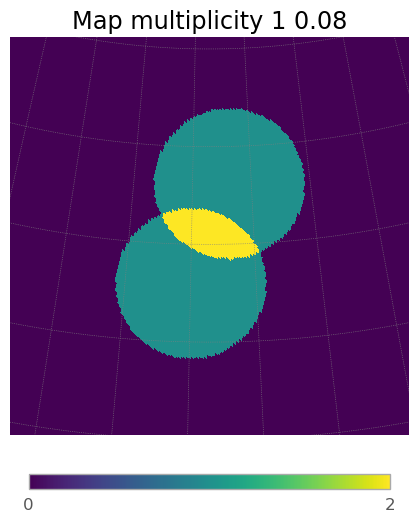

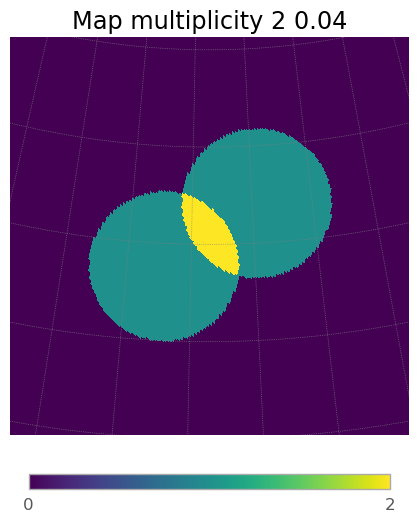

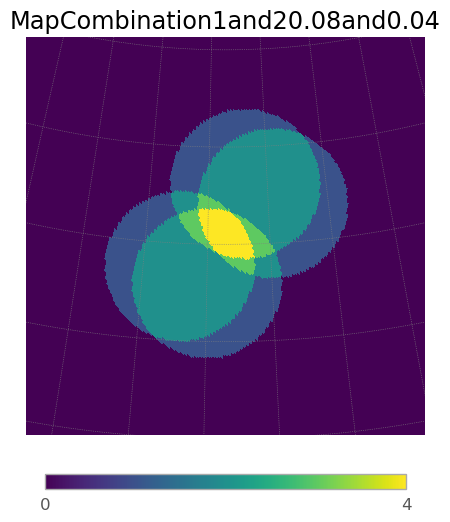

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T05:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T05:00:00.000


2it [00:00,  6.66it/s]
2it [00:00,  6.94it/s]


(103.95438633732687, 1.7905891257726756)


2it [00:00,  7.26it/s]
2it [00:00,  6.83it/s]
2it [00:00,  6.07it/s]


10.141988175330752


2it [00:00,  6.95it/s]


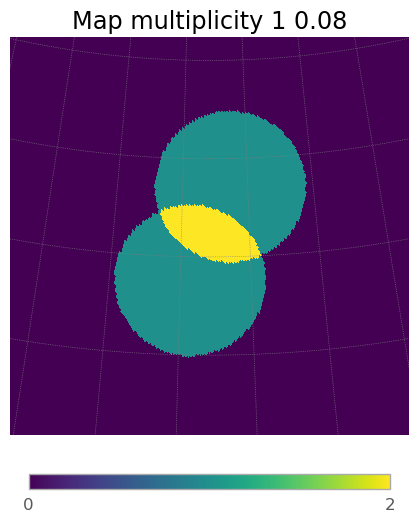

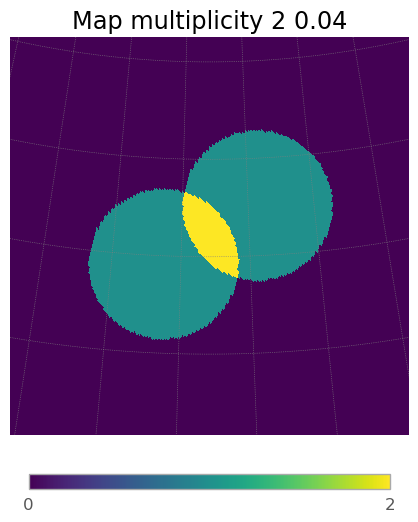

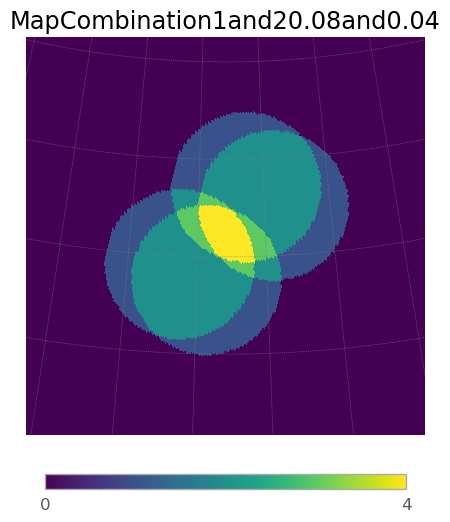

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T05:20:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T05:20:00.000


2it [00:00,  6.02it/s]
2it [00:00,  6.88it/s]


(101.8299242978861, 1.8278171281390856)


2it [00:00,  6.98it/s]
2it [00:00,  6.37it/s]
2it [00:00,  5.34it/s]


10.088947126627087


2it [00:00,  6.73it/s]


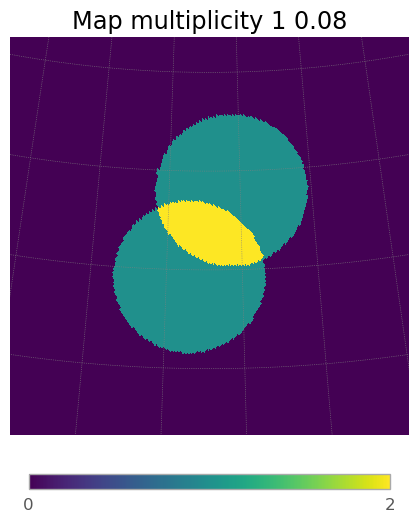

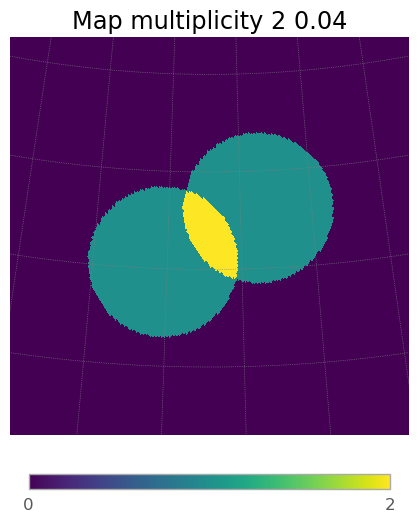

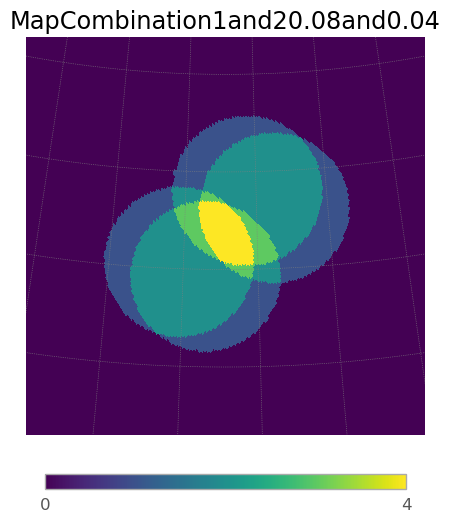

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T05:40:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T05:40:00.000


2it [00:00,  6.10it/s]
2it [00:00,  6.51it/s]


(99.70546225844532, 1.86636853873471)


2it [00:00,  5.90it/s]
2it [00:00,  6.49it/s]
2it [00:00,  5.81it/s]


10.027880850371165


2it [00:00,  6.90it/s]


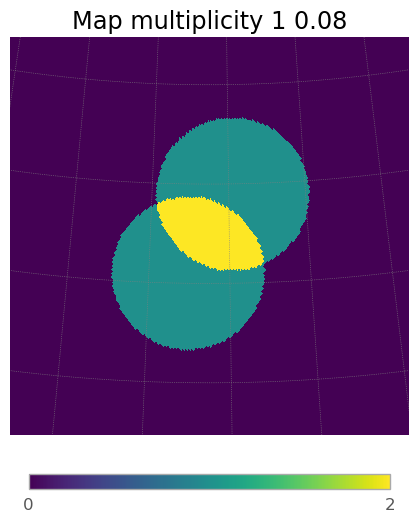

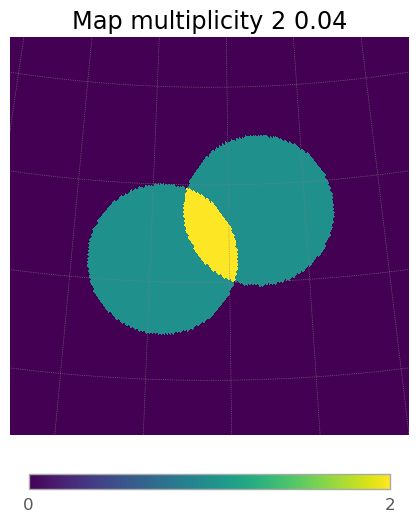

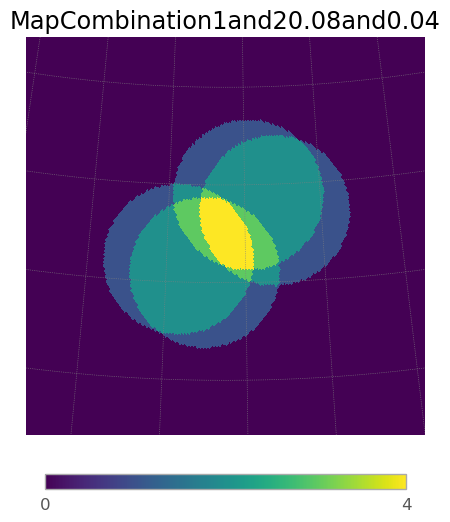

None


In [24]:
obs_h=2
for dt in range(int(obs_h*3)): 
    print('\n')
    initial_pointing_dir=array.get_pointing_coord(icrs=True)
    initial_pointing_dir_2=array_2.get_pointing_coord(icrs=True)
    array_2.update_frame(delta_t = 20*u.min, verbose=True)
    array.update_frame(delta_t = 20*u.min, verbose=True)
    new_frame_2=array_2.frame.altaz
    new_frame=array.frame.altaz
    star_altaz_2=star_2.transform_to(new_frame)
    star_altaz=star.transform_to(new_frame)
    #print(array.table[0])
    if star_altaz_2.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    if star_altaz.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    else:
        
        print(array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True))
        print(array.multiplicity_plot_2_div(array_2))


f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV, color="b", label="hFoV")
p2 = ax.plot(t, alt, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)

f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV_2, color="b", label="hFoV")
p2 = ax.plot(t, alt_2, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve_2, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)